# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


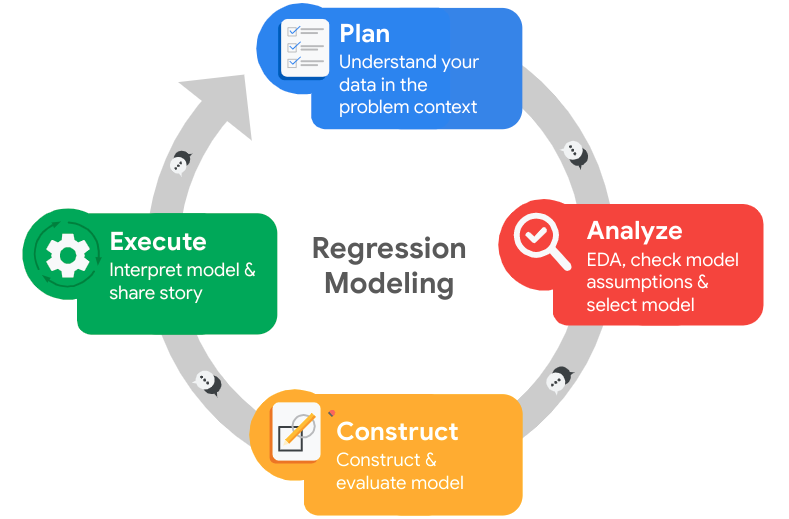

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The stakeholders for this project are the HR department at Salifort Motors.
2. The problem we are trying to solve is identify what's likley causing employees to leave the company.
3. The given dataset contains 14999 rows and 10 columns. Just two columns are categorical, while the rest are numerical. There are no nulls and 3008 duplicate rows. The time_spent_company has 824 outliers.
4. The resources used so far are the python programming language, a jupyter notebook, and VSCode. No links are necessary.
5. I do not have any ethical considerations at this stage.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [5]:
# Import packages
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                            f1_score, confusion_matrix,
                            classification_report, ConfusionMatrixDisplay)

In [6]:
# check library versions
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'Seaborn version: {sns.__version__}')
import matplotlib
print(f'matplotlib version: {matplotlib.__version__}')
import sklearn
print(f'sklearn version: {sklearn.__version__}')
import xgboost
print(f'XGBoost version: {xgboost.__version__}')


Numpy version: 2.0.2
Pandas version: 2.2.2
Seaborn version: 0.13.2
matplotlib version: 3.10.0
sklearn version: 1.6.1
XGBoost version: 3.0.3


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [7]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Load dataset into a dataframe
df = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [8]:
# Gather basic information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [9]:
# Gather descriptive statistics about the data
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,NaN,NaN,NaN,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,NaN,NaN,NaN,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,NaN,NaN,NaN,3.803054,1.232592,2.0,3.0,4.0,5.0,7.0
average_montly_hours,14999.0,NaN,NaN,NaN,201.050337,49.943099,96.0,156.0,200.0,245.0,310.0
time_spend_company,14999.0,NaN,NaN,NaN,3.498233,1.460136,2.0,3.0,3.0,4.0,10.0
Work_accident,14999.0,NaN,NaN,NaN,0.14461,0.351719,0.0,0.0,0.0,0.0,1.0
left,14999.0,NaN,NaN,NaN,0.238083,0.425924,0.0,0.0,0.0,0.0,1.0
promotion_last_5years,14999.0,NaN,NaN,NaN,0.021268,0.144281,0.0,0.0,0.0,0.0,1.0
Department,14999,10,sales,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,14999,3,low,7316,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [10]:
# Display all column names
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [11]:
# Rename columns as needed
renamed_columns = {'average_montly_hours':'average_monthly_hours',
                  'time_spend_company':'tenure',
                  'Work_accident':'work_accident',
                  'Department':'department'}
df.rename(columns=renamed_columns, inplace=True)

# Display all column names after the update
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [12]:
# Check for missing values
df.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_monthly_hours,0
tenure,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


### Check duplicates

Check for any duplicate entries in the data.

In [13]:
# Check for duplicates
df.duplicated().sum()

np.int64(3008)

In [14]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [15]:
# which rows have the most duplicates
# an added `size` column contains the number of duplicates
# print the first 5 rows
df.groupby(df.columns.tolist(), as_index=False).size().sort_values(by=['size'], ascending=False)[:5]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,size
2833,0.46,0.57,2,139,3,0,1,0,sales,low,6
2335,0.42,0.53,2,142,3,0,1,0,sales,low,4
1757,0.37,0.51,2,127,3,0,1,0,sales,medium,4
188,0.10,0.85,6,266,4,0,1,0,sales,low,4
1719,0.37,0.46,2,156,3,0,1,0,sales,low,4


In [16]:
# Drop duplicates and save resulting dataframe in a new variable as needed
# the keep='first' parameter is the default, so there is no need to specify it here.
# inplace=True overwrites the exising data frame without creating a new one.
# ignore_index=True resets the index without gaps
df.drop_duplicates(inplace=True, ignore_index=True)

# Display first few rows of new dataframe as needed
df.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [17]:
# get the number of rows after we dropped duplicates.
df.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

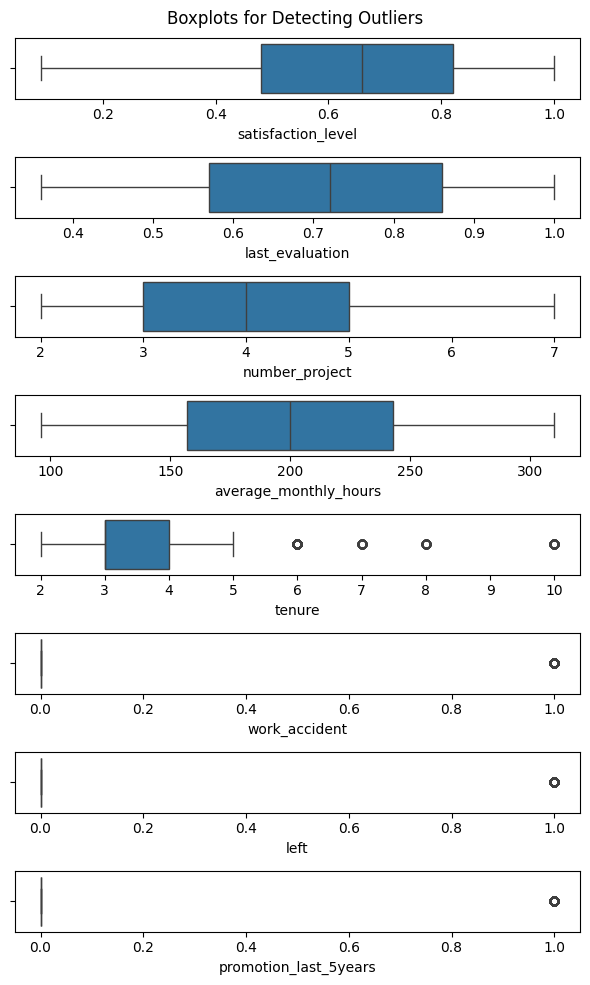

In [18]:
# Create a boxplot to visualize distribution of all columns
# and detect any outliers
plt.figure(figsize=(6,10))
plt.suptitle('Boxplots for Detecting Outliers')

numeric_cols = df.select_dtypes(include='number').columns.tolist()
n_rows = len(numeric_cols)

for i, column in enumerate(numeric_cols):
    row = plt.subplot(n_rows, 1, i + 1)
    bxplt = sns.boxplot(x=df[column], ax=row)

plt.tight_layout()
plt.show()

In [19]:
# Looks like the `tenure` column has any outliers
# Determine the number of rows containing outliers
#  and they are in the upper range
# let's use the interquartile range method
q1 = df['tenure'].quantile(0.25)
q3 = df['tenure'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
upper_outliers = df[df['tenure']> upper_bound]
print(f"The number of outliers in `tenure`: {upper_outliers['tenure'].count()}")

The number of outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

* The model most affected by outliers is Logistic Regression, so we'll address it as needed when we get there.
* The other models such as Decision Trees, Random Forest, and XGBoost are more robust to outliers.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. There is a positive correlation between the number of projects and average monthly hours. On the other hand, there is a negative correlation between employees leaving and satisfaction level.
2. Looking at the distrubution of the employees who left. there is an imbalance. More employees stayed than left.
3. The transformation needed were to rename some columns to standardize them and correct any misspelings. the data was untouched at this point.
4. The purpose of EDA is become familiar with the data to ensure the correct format, address any missing or outliers taht may affect model training.
5. The resources used during this stage were numpy, pandas, seaborn, and matplotlib.
6. I did not see any ethical considerations to address.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [20]:
# Get numbers of people who left vs. stayed
# 0 = stayed
# 1 = left
print(df['left'].value_counts())
print()
# Get percentages of people who left vs. stayed
print(df['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


The number of employess that left the company is **1991** or about **16.6%**. This leaves us with a potential class imbalance that may affect model training.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

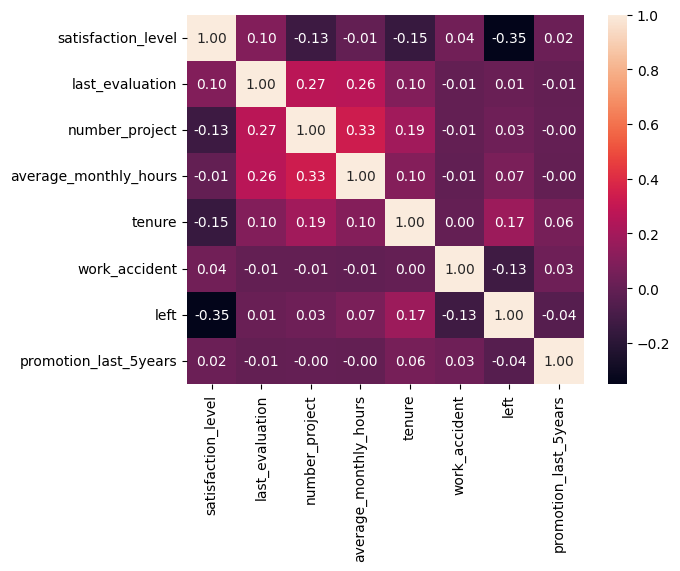

In [21]:
# Before we dive deeper into the individual relationships between each column,
# let's first look as the correlation matrix of the numerical coumns.
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()


The above heat map shows a correlation between average monthly hours and number of projects for all employees. Also notice the negative dorrelation between satisfaction level and left.

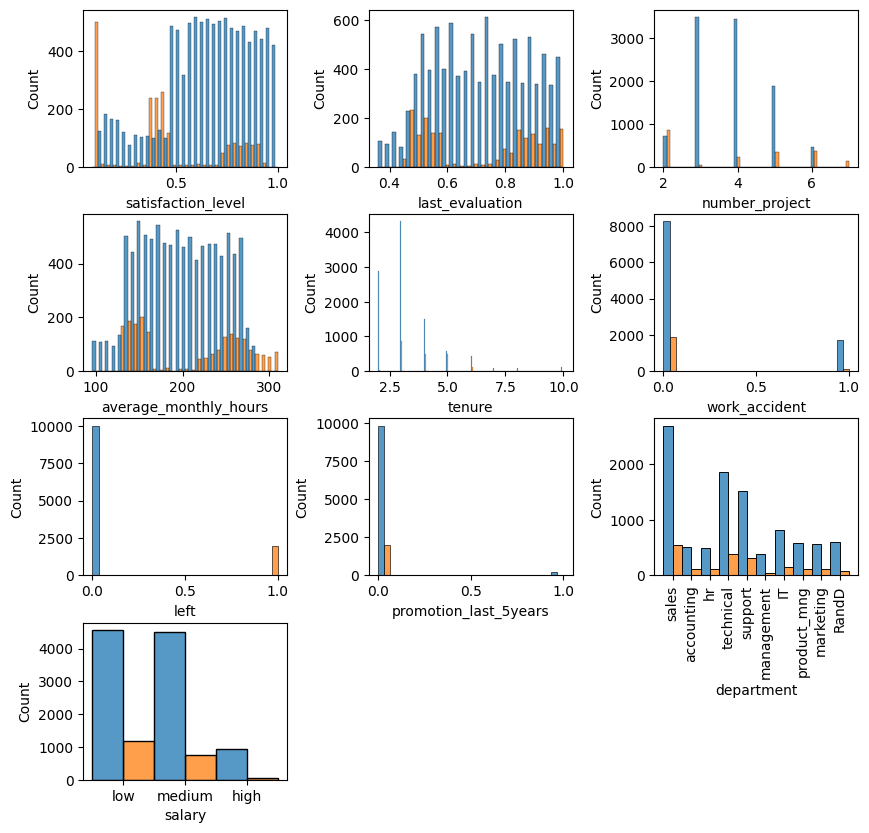

In [22]:
# Let's look at all the columns as histograms as they relate to left.
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.3, wspace=0.4)
cols = df.columns
ncols = 3
nrows = len(cols) // ncols + (len(cols) % ncols > 0)

for n, col in enumerate(cols):
    axis = plt.subplot(nrows, ncols, n + 1)
    ax = sns.histplot(df, x=col, hue='left', ax=axis, multiple='dodge', legend=False)
    if col == 'department':
        ax.tick_params(axis='x',rotation=90)

#plt.tight_layout()
plt.show()


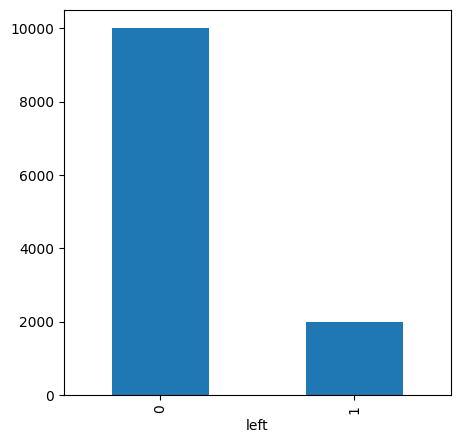

In [23]:
# show graphically the difference in employees who left to those who stayed.
plt.figure(figsize=(5,5))
df['left'].value_counts().plot.bar()
plt.show()


The bar chart above is a graphical repreentation of the value counts for the left column. When an eployee leaves, they are labeled as 1.Here we can visualize the class imbalance.

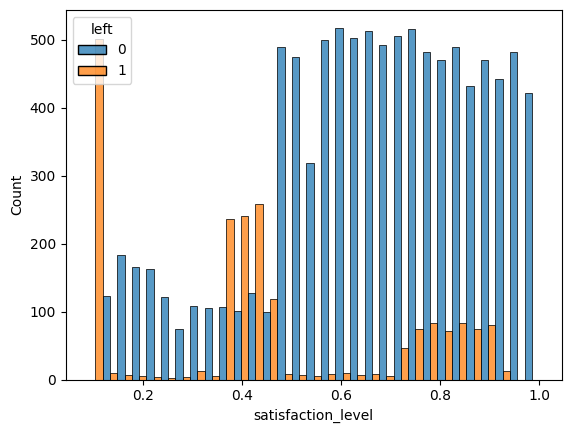

In [24]:
# compare satisfaction level with left
sns.histplot(df, stat='count',multiple='dodge',x='satisfaction_level',hue='left',legend=True, element='bars')
plt.show()


There should be no surprise here that if an employee satisfaction level is zero, they are likely to leave the company.

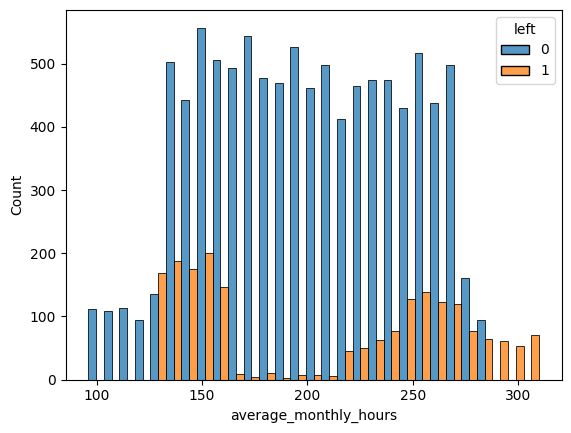

In [25]:
# compare satisfaction level with left
sns.histplot(df, stat='count',multiple='dodge',x='average_monthly_hours',hue='left',legend=True, element='bars')
plt.show()


For employees who left, we see two groups. Also notice that when employees work more than 287 hours a month, they leave. This could indicate that they are being overworked.

In [26]:
# let's get the max average monthly hours for workers who stayed.
stayed_max_hrs = df[df['left']==0]['average_monthly_hours'].max()
print(f'Max hours for employees who stayed: {stayed_max_hrs}')

Max hours for employees who stayed: 287


In [27]:
overworked_count = df.query('left==1 and average_monthly_hours>287')
print(f"Number of employees that left with average monthly hours over 287: {overworked_count['left'].count()}")

Number of employees that left with average monthly hours over 287: 184


All **184** employees that worked more than **287** average hours a month left the company. This represents **9.2%** of the employees that left.

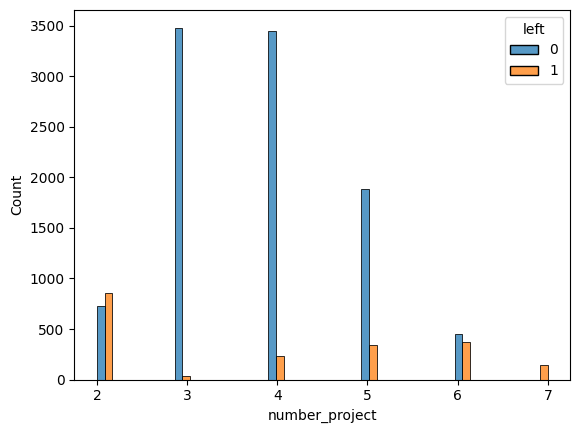

In [28]:
# compare number of projects with left
sns.histplot(df, stat='count',multiple='dodge',x='number_project',hue='left',legend=True, element='bars')
plt.show()


In the number of projects histogram, we can see that employees left the company when they have 7 projects. This is another indication employees that left are being overworked. On the other end of the spectrum, more employees with 2 projects left than stayed.

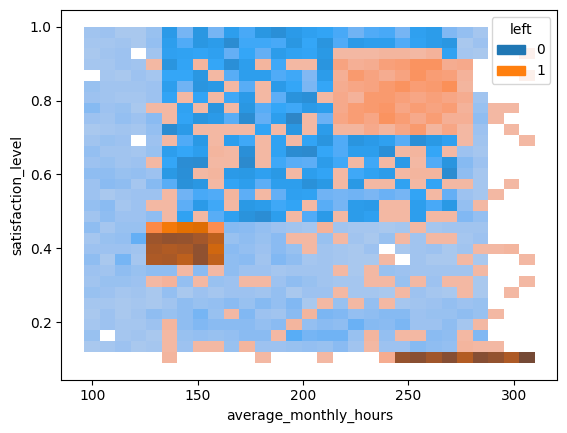

In [29]:
# This graphic depicts the heatmap of employee satisfaction level with average monthly hours.
sns.histplot(df, stat='count',multiple='dodge',x='average_monthly_hours',
                  y='satisfaction_level',hue='left',legend=True, element='bars')
plt.show()


Notice the odd patterns in the distribution of emplyees who left verus those who statyed. This is indicitave of manufactured data. However, we can see a dark red bar in the lower right. This confirms what we already identified about employees who are overworked and have a low satisfaction level.

### Insights

* Of a company with 14,999 employees (rows), 3008 were duplicates (20%). This reduced the employee count to 11,991.
* From those employees, 1991 left the company leaving 10000 that stayed. These are nice round numbers. Interesting that 10,000 employees stayed. Seems fishy.
* When looking for outliers, tenure was the only feture with any. The outliers were inthe upper range above 5 years with 824 employees.
* The histogram of employee satisfaction levels shown that a large portion of employees left the company as satisfaction level 0.
* All 184 employees that worked over 287 average monthly hours left the company. This is likely due to being overworked.
* When an employee is working on 7 projects, they leave the company. The majority of employees with 2 project leave the company.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





Before we move on to building a model, we must first addess any columns with categorical features. Specifically, we must encode the `department` and `salary` columns to numerical. The reason for this is models require the data to be in numerical form in order to learn any patterns in the data.

For the `department` column, we'll use pandas `get_dummies` function.

For the `salary` column, we'll use pandas replace function and a dictionary of key-value pairs.

In [30]:
# print out the department names
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [31]:
# use get_dummies to encode the different departments as different unique colunms.
encoded_df = pd.get_dummies(df, columns=['department'])
encoded_df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,low,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,medium,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,medium,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,low,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,low,False,False,False,False,False,False,False,True,False,False


In [32]:
# now we encode the `salary` column. But this time we do not make
# any new columns because the data is ordinal, which means order is important
dict = {'low':0,'medium':1,'high':2}
encoded_df['salary'] = encoded_df['salary'].replace(dict)
encoded_df.head()

/tmp/ipython-input-2458705037.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_df['salary'] = encoded_df['salary'].replace(dict)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Training each model is time consuming process. Random Forest took by far the most time to search for the best hyperparameters.
2. After the columns were encoded, they were all used as independent variables. The reason is the correlation between each column was low enough that they won't effect each other.
3. The assumption that the target variable is categorical is ture because it has just two options, true or false.The observations were independent of each other after we removed any duplicates.
4. With the exception of logistic regression, the other models performed outstanding. They each scored above 90% accuracy. Their F1 scores also were above 90%.
5. With such high scores, there is no need to improve the models.
6. The models used in this phase were logistics regression, decision trees, random forest, and XGBoost.
7. I do not see any ethical considerations at this point.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Since the goal of this project is to predict whether an employee will leave the company, we are looking at a binary target. In which case, we will use classification models that can classify the predictions as true or false for an employee leaving or staying, respectively.

### Identify the types of models most appropriate for this task.

In this project, we will use:
 * Logistic Regression
 * Decision Trees
 * Random Forest
 * XGBoost

### Modeling

Add as many cells as you need to conduct the modeling process.

In [33]:
# get the target variable
y = encoded_df['left']

# get the predictor variables
X = encoded_df.drop(columns=['left'])


In [34]:
# split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
# get an idea of the number of rows
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8993, 18), (8993,), (2998, 18), (2998,))

**Logistic Regression Model**

In [35]:
##################################################
# begine model building with logistics regression
# instantiate the logistics regression model and fit it to the training data.
lr = LogisticRegression(random_state=42, max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [36]:
# use the trained model to make predicitons on the test dataset
y_lr_pred = lr.predict(X_test)

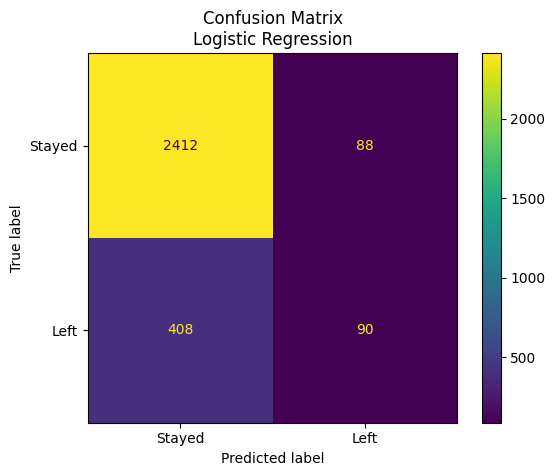

In [37]:
# how well did the model classify whether an employee left or not.
cm = confusion_matrix(y_test, y_lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed','Left'])
disp.plot()
plt.title('Confusion Matrix\nLogistic Regression')
plt.show()

In [38]:
# create a nice classification report
print(classification_report(y_test, y_lr_pred, target_names=['Stayed','Left']))

              precision    recall  f1-score   support

      Stayed       0.86      0.96      0.91      2500
        Left       0.51      0.18      0.27       498

    accuracy                           0.83      2998
   macro avg       0.68      0.57      0.59      2998
weighted avg       0.80      0.83      0.80      2998



In [39]:
# store the various metrics for comparison to the other models later.
lr_acc_score = accuracy_score(y_test, y_lr_pred)
lr_prec_score = precision_score(y_test,y_lr_pred)
lr_rec_score = recall_score(y_test, y_lr_pred)
lr_f1_score = f1_score(y_test, y_lr_pred)

In [40]:
# (OPTIONAL)
# save the logisitcs regression model
with open('lr_model.pickle','wb') as to_write:
    pickle.dump(lr, to_write)

**Decision Tree Model**

In [41]:
###########################################
# Begine the decision tree model training with grid search
dt = DecisionTreeClassifier(random_state=42)

dt_params = {'max_depth':[3,5,7,None],
             'min_samples_split':[2,5,10],
             'criterion':['gini','entropy']}
scoring = ['accuracy', 'precision', 'recall','f1']

dt_cv = GridSearchCV(estimator=dt, param_grid=dt_params,
                     cv=5, scoring=scoring, refit='f1')
dt_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_split': [2, 5, 10]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [42]:
# get the best parameters from the grid search
dt_cv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 10}

In [43]:
# get best F1 score
dt_cv.best_score_

np.float64(0.9438175907628678)

In [44]:
# use the trained model to make predicitons on the test dataset
# get the predictions.
y_dt_pred = dt_cv.best_estimator_.predict(X_test)

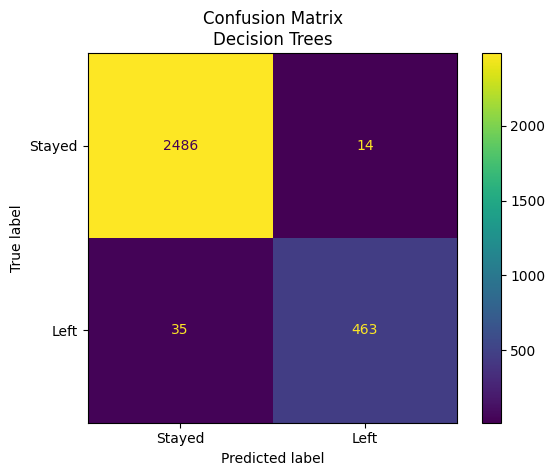

In [45]:
# decision tree classifier confusion matrix
dt_cm = confusion_matrix(y_test, y_dt_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=['Stayed','Left'])
disp.plot()
plt.title('Confusion Matrix\nDecision Trees')
plt.show()

In [46]:
# classification report
print(classification_report(y_test, y_dt_pred, target_names=['Stayed','Left']))

              precision    recall  f1-score   support

      Stayed       0.99      0.99      0.99      2500
        Left       0.97      0.93      0.95       498

    accuracy                           0.98      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



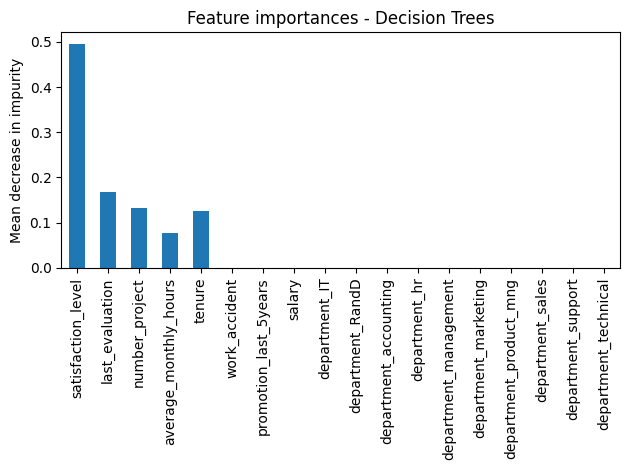

In [47]:
importances = dt_cv.best_estimator_.feature_importances_
dt_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots()
dt_importances.plot.bar(ax=ax)
ax.set_title('Feature importances - Decision Trees')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

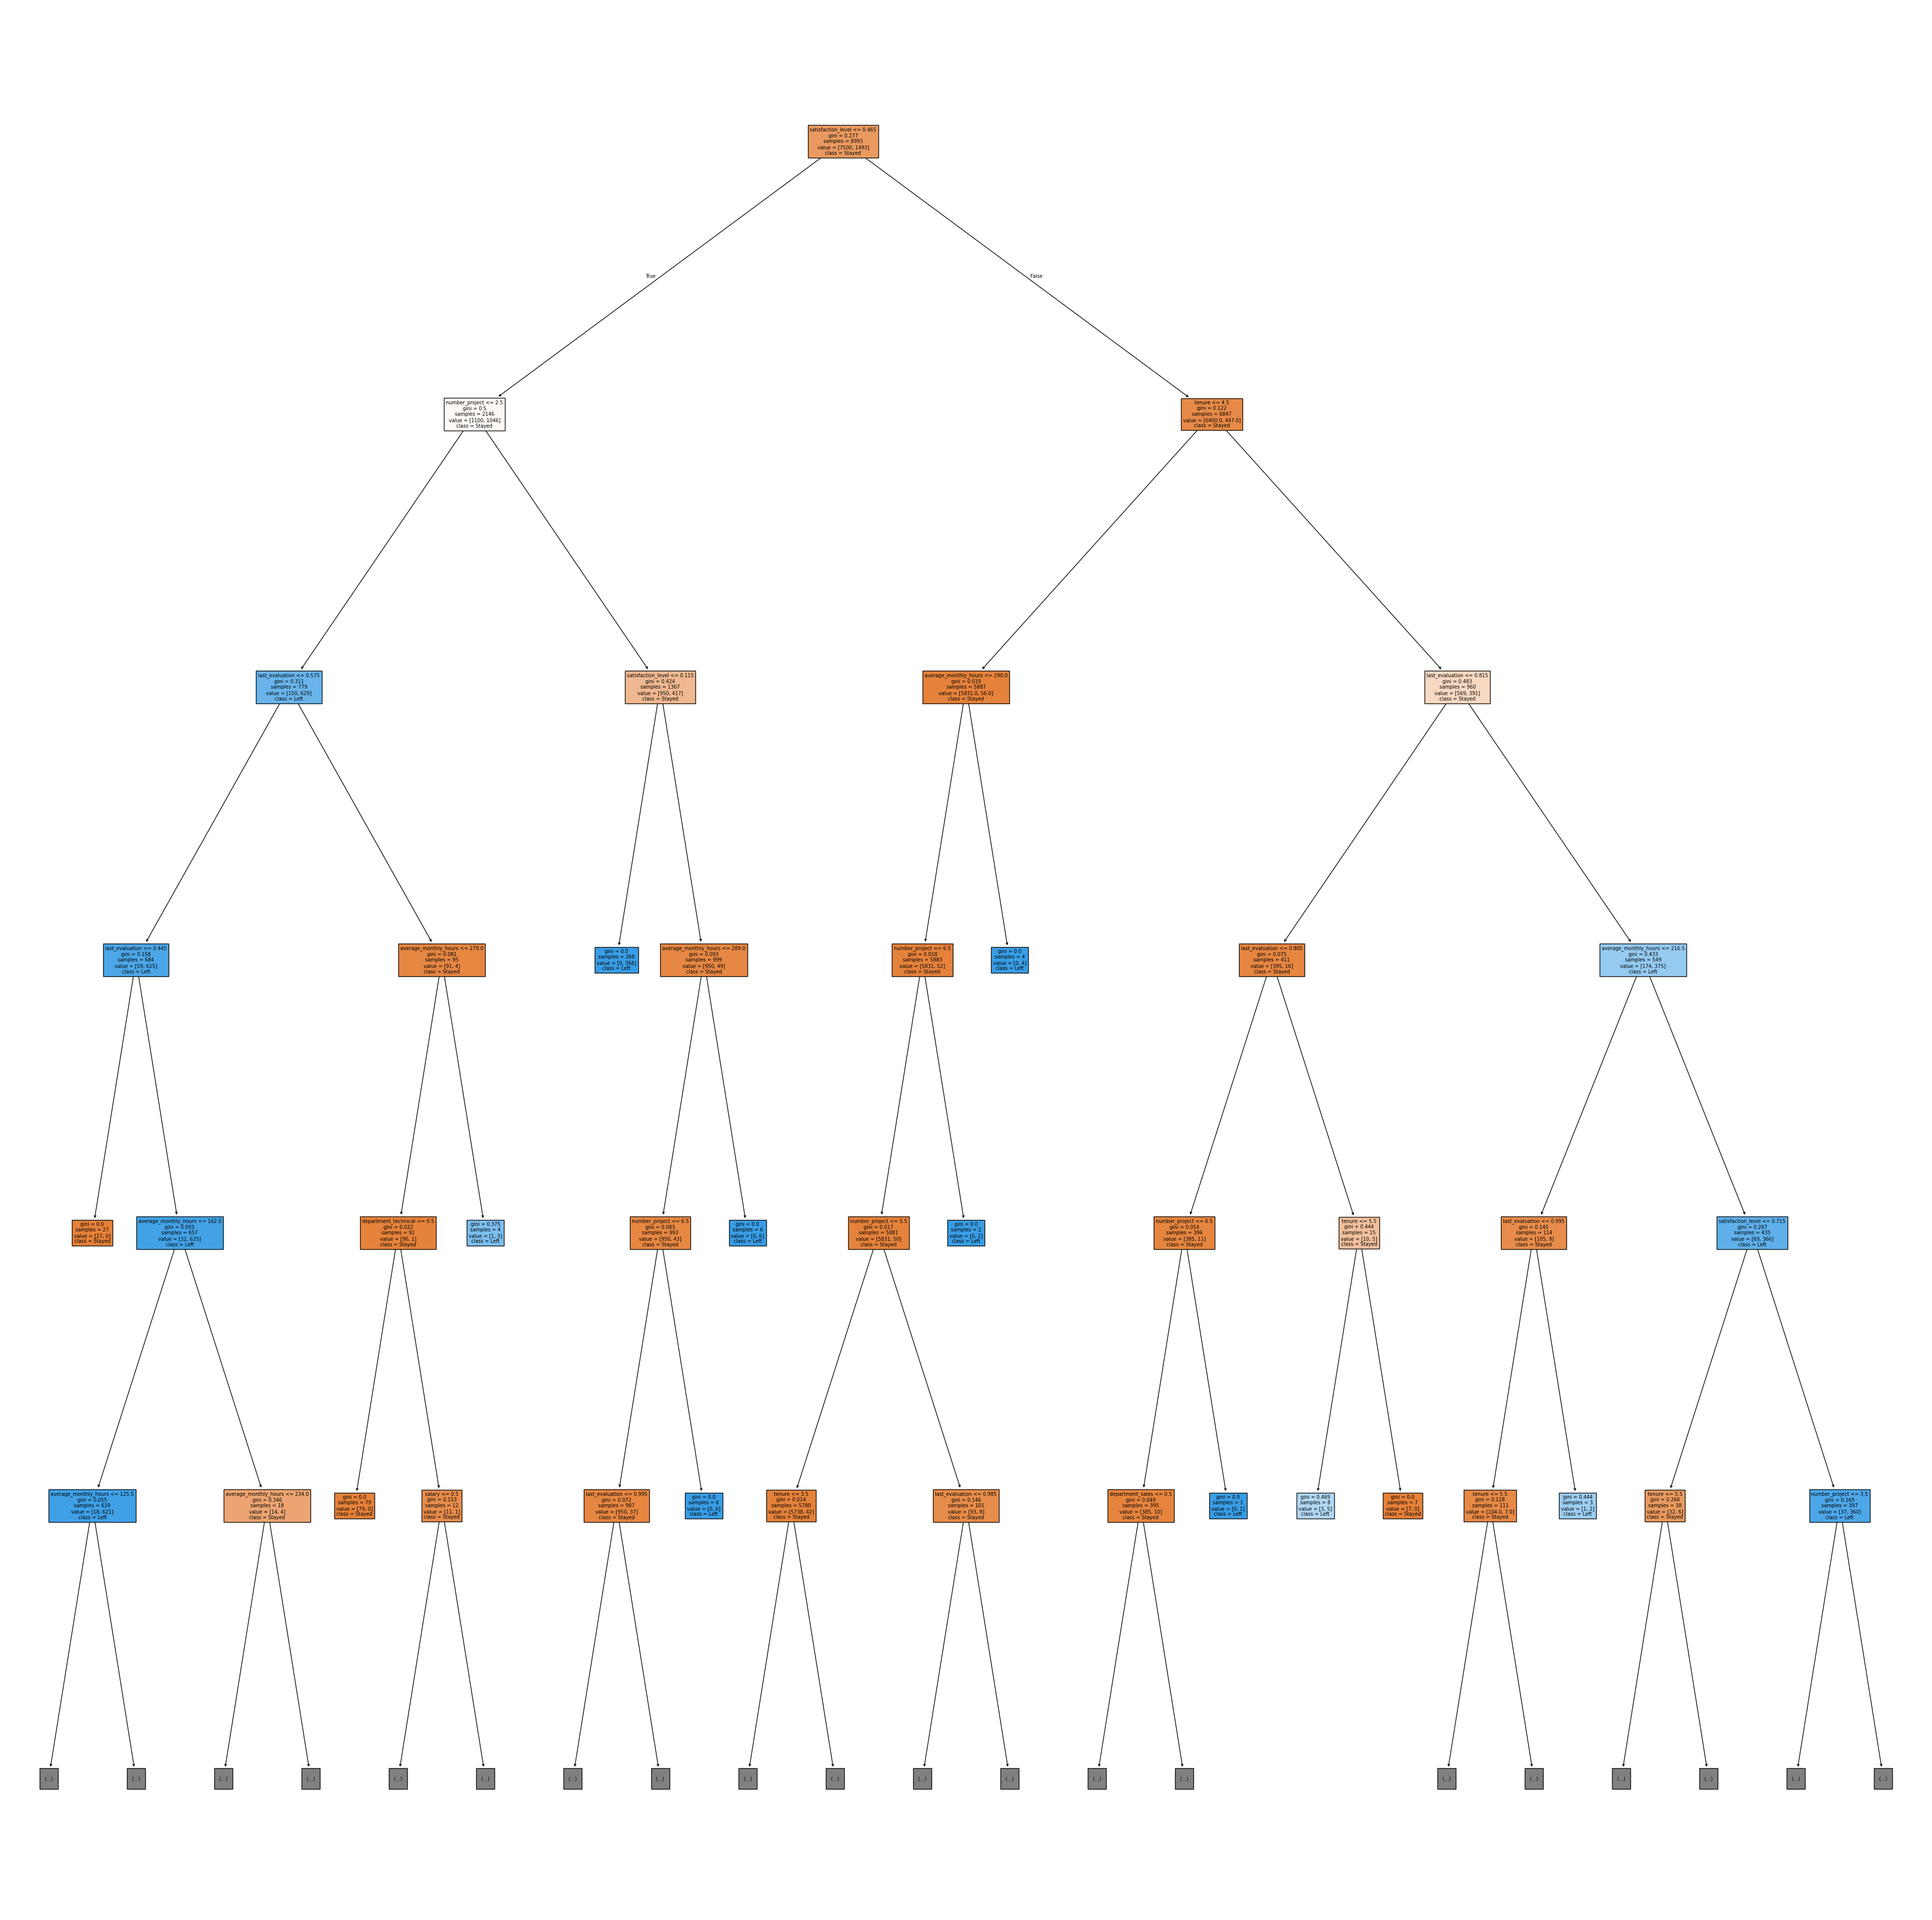

In [48]:
# show the decision tree graphic to view where the splits are for decisions.
plt.figure(figsize=(50,50))
classes = ['Stayed','Left']
plot_tree(dt_cv.best_estimator_, max_depth=5, feature_names=X.columns,
          class_names=classes, filled=True)
plt.show()

In [49]:
# (OPTIONAL)
# save the Decision tree model as a pickle
with open('dt_model.pickle','wb') as to_write:
    pickle.dump(dt_cv, to_write)

**Random Forest Model**

In [50]:
######################################################################
# Begin random forest modeling
# CAUTION: this model is very time consuming.
# Took over 18 minutes to perform grid search
rf = RandomForestClassifier(random_state=42)

rf_params = {'n_estimators':[100,150,200],
             'max_features':[1,3,5,7],
             'max_depth':[3,5,10, None],
             'min_samples_leaf':[1,2,3],
             'min_samples_split':[1,2,3]}
scores = ['accuracy','precision','recall','f1']
rf_cv = GridSearchCV(rf, rf_params, scoring=scores, cv=5, refit='f1')
rf_cv.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [51]:
# Get the best parameters from the grid search
rf_cv.best_params_

{'max_depth': 10,
 'max_features': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [52]:
# print the best f1 score
rf_cv.best_score_

np.float64(0.9502696498310457)

In [53]:
# random forest prediction
y_rf_pred = rf_cv.best_estimator_.predict(X_test)

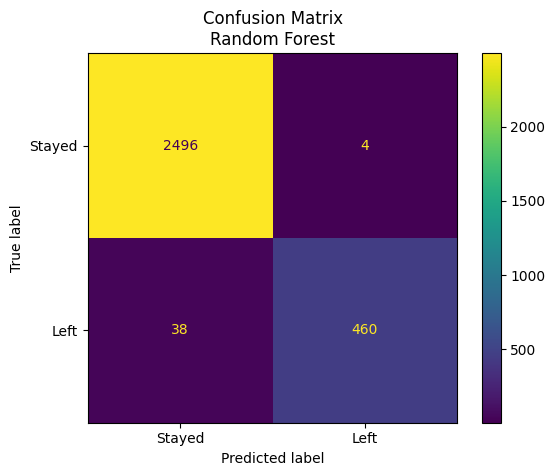

In [54]:
# decision tree classifier confusion matrix
rf_cm = confusion_matrix(y_test, y_rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['Stayed','Left'])
disp.plot()
plt.title('Confusion Matrix\nRandom Forest')
plt.show()

In [55]:
# classification report
print(classification_report(y_test, y_rf_pred, target_names=['Stayed','Left']))

              precision    recall  f1-score   support

      Stayed       0.99      1.00      0.99      2500
        Left       0.99      0.92      0.96       498

    accuracy                           0.99      2998
   macro avg       0.99      0.96      0.97      2998
weighted avg       0.99      0.99      0.99      2998



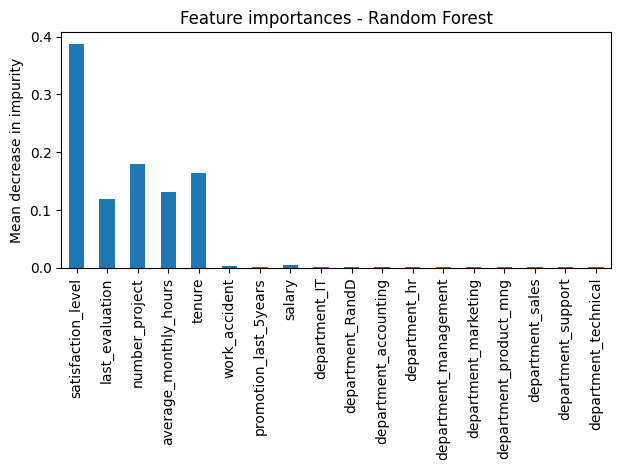

In [56]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances - Random Forest')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

In [57]:
# save random forest model as a pickle
with open('rf_model.pickle','wb') as to_write:
    pickle.dump(rf_cv,to_write)

**XGBoost Classifier Model**

In [58]:
#########################################################################
# XGBoost Classifier
# took about 4 minutes to run.
xgb = XGBClassifier(random_state=42)
xgb_params = {'max_depth': [4,5,6,7,8],
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125]}
scoring = ['accuracy','precision','recall','f1']
xgb_cv = GridSearchCV(xgb, xgb_params, scoring=scoring, cv=5, refit='f1')
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [59]:
# print the best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 75}

In [60]:
# print the best estimator f1 score
xgb_cv.best_score_

np.float64(0.9497944213606333)

In [61]:
# XGBoost prediction
y_xgb_pred = xgb_cv.best_estimator_.predict(X_test)

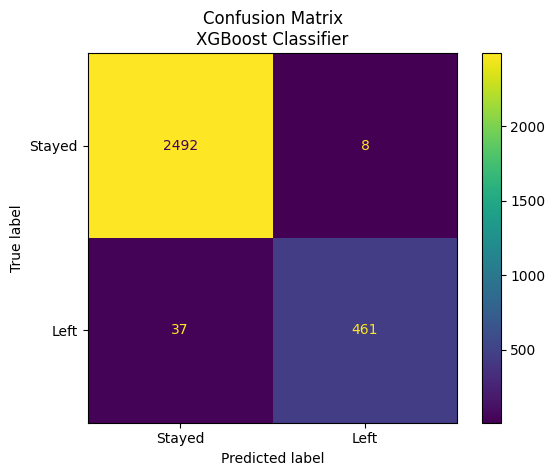

In [62]:
# decision tree classifier confusion matrix
xgb_cm = confusion_matrix(y_test, y_xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=['Stayed','Left'])
disp.plot()
plt.title('Confusion Matrix\nXGBoost Classifier')
plt.show()

In [63]:
print(classification_report(y_test, y_xgb_pred, target_names=['Stayed','Left']))

              precision    recall  f1-score   support

      Stayed       0.99      1.00      0.99      2500
        Left       0.98      0.93      0.95       498

    accuracy                           0.98      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



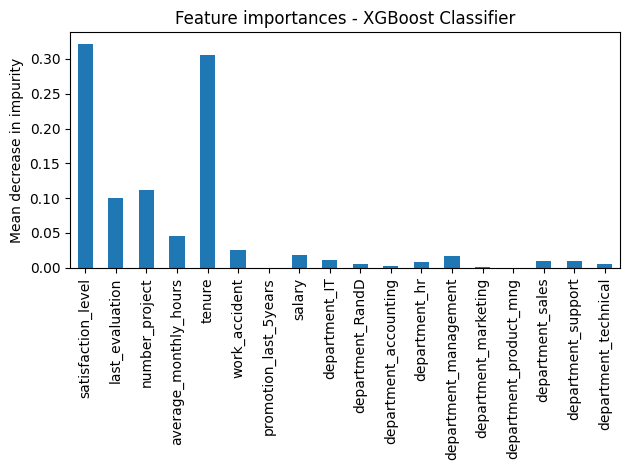

In [64]:
importances = xgb_cv.best_estimator_.feature_importances_
xgb_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots()
xgb_importances.plot.bar(ax=ax)
ax.set_title('Feature importances - XGBoost Classifier')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

In [65]:
#(OPTIONAL)
# save XGB model as a pickle
with open('xgb_model.pickle','wb') as to_write:
    pickle.dump(xgb_cv,to_write)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results


In [66]:
# function to collect metrics and format them in a data frame
def make_results(model_name, model_object):
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(),:]

    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    table = pd.DataFrame({'Model':[model_name],
                          'F1':[f1],
                          'Recall':[recall],
                          'Precision':[precision],
                          'Accuracy':[accuracy]})
    return table

In [67]:
# the performance metrics from each model that are saved in a csv file
dt_results = make_results('Decision Trees',dt_cv)
rf_results = make_results('Random Forest',rf_cv)
xgb_results = make_results('XGBoost Model',xgb_cv)
lr_results = pd.DataFrame({'Model':['Logistic Regression'],'F1':[lr_f1_score],
                                    'Recall':[lr_rec_score],'Precision':[lr_prec_score],
                                    'Accuracy':[lr_acc_score]})
results = pd.concat([dt_results, rf_results, xgb_results,lr_results]).sort_values(by=['F1'],ascending=False).reset_index(drop=True)
results.to_csv('model_metrics.csv',index=False)

In [68]:
# print the performance metrics of each model in a nice table sorted by F1 score
results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest,0.950270,0.915598,0.987749,0.984099
1,XGBoost Model,0.949794,0.918947,0.982855,0.983876
2,Decision Trees,0.943818,0.917605,0.971645,0.981874
3,Logistic Regression,0.266272,0.180723,0.505618,0.834556


Based on the performance of each model as indicated by the F1 score, the champion model is the random forest classifier with an F1 score of 0.95. Recall that the F1 score is the harmonic mean of recall and precision.

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.